# EMOTION RECOGNITION AND PREDICTION FROM TEXT USING MACHINE LEARNING AND DEEP LEARNING APPROCHES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn import preprocessing
from tqdm import tqdm
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import tensorflow as tf
print(tf.__version__)

2.4.1


Importing the necessary libraries needed for this problem.

In [2]:
df1 = pd.read_csv('isear1.csv')

In [3]:
df1.head()

,Emotion,Text
0,joy,"During the period of falling in love, each tim..."
1,fear,When I was involved in a traffic accident.
2,anger,When I was driving home after several days of...
3,sadness,When I lost the person who meant the most to me.
4,joy,When I got a letter offering me the Summer job...


In [4]:
df1.shape

(4282, 2)

In [5]:
df1['Emotion'].value_counts()

joy        1080
fear       1077
anger      1064
sadness    1061
Name: Emotion, dtype: int64

In [6]:
df2 = pd.read_csv('meld1.csv')

In [7]:
df2.head()

,Emotion,Text
0,neutral,also I was the point person on my company’s tr...
1,neutral,You must’ve had your hands full.
2,neutral,That I did. That I did.
3,neutral,So let’s talk a little bit about your duties.
4,neutral,"Now you’ll be heading a whole division, so you..."


In [8]:
df2.shape

(8501, 2)

In [9]:
df2['Emotion'].value_counts()

neutral    4706
joy        1738
anger      1109
sadness     681
fear        267
Name: Emotion, dtype: int64

In [10]:
df3 = pd.read_csv('Emotion_final3.csv')

In [11]:
df3.head()

,Emotion,Text
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,anger,i am feeling grouchy
4,sadness,ive been feeling a little burdened lately wasn...


In [12]:
df3.shape

(11377, 2)

In [13]:
df3['Emotion'].value_counts()

sadness    5914
anger      2889
fear       2574
Name: Emotion, dtype: int64

In [14]:
data = pd.concat([df1,df2,df3])
data.head()

,Emotion,Text
0,joy,"During the period of falling in love, each tim..."
1,fear,When I was involved in a traffic accident.
2,anger,When I was driving home after several days of...
3,sadness,When I lost the person who meant the most to me.
4,joy,When I got a letter offering me the Summer job...


In [15]:
data.shape

(24160, 2)

In [16]:
data['Emotion'].value_counts()

sadness    7656
anger      5062
neutral    4706
fear       3918
joy        2818
Name: Emotion, dtype: int64

In [17]:
emot = data.copy(deep=True)

In [18]:
emot.head()

,Emotion,Text
0,joy,"During the period of falling in love, each tim..."
1,fear,When I was involved in a traffic accident.
2,anger,When I was driving home after several days of...
3,sadness,When I lost the person who meant the most to me.
4,joy,When I got a letter offering me the Summer job...


In [19]:
emot['Emotion'].value_counts()

sadness    7656
anger      5062
neutral    4706
fear       3918
joy        2818
Name: Emotion, dtype: int64

In [20]:
# Number of labels: joy, anger, fear, sadness, neutral
num_classes = 5
class_names = ['joy', 'fear', 'anger', 'sadness', 'neutral']

# DATA PRE-PROCESSING

In [21]:
import re
import nltk
from nltk.tokenize import word_tokenize

def clean_text(cl_text):
    cl_text = re.sub(r'http\S+', '', cl_text)                         #Removing url
    cl_text = re.sub('[^a-zA-Z]',' ',cl_text)                         #Removing numbers and punctuations            
    cl_text = word_tokenize(cl_text)                                  #Tokenization
    cl_text = ' '.join(cl_text)                                       #converting tokens to string
    return cl_text
emot['clean_text']=emot['Text'].apply(clean_text)

In [22]:
emot.head()

,Emotion,Text,clean_text
0,joy,"During the period of falling in love, each tim...",During the period of falling in love each time...
1,fear,When I was involved in a traffic accident.,When I was involved in a traffic accident
2,anger,When I was driving home after several days of...,When I was driving home after several days of ...
3,sadness,When I lost the person who meant the most to me.,When I lost the person who meant the most to me
4,joy,When I got a letter offering me the Summer job...,When I got a letter offering me the Summer job...


In [23]:
emts = emot.copy(deep=True)
emts.head()

,Emotion,Text,clean_text
0,joy,"During the period of falling in love, each tim...",During the period of falling in love each time...
1,fear,When I was involved in a traffic accident.,When I was involved in a traffic accident
2,anger,When I was driving home after several days of...,When I was driving home after several days of ...
3,sadness,When I lost the person who meant the most to me.,When I lost the person who meant the most to me
4,joy,When I got a letter offering me the Summer job...,When I got a letter offering me the Summer job...


In [24]:
emts.drop(["Text"], axis=1, inplace=True)
emts.rename(columns = {'clean_text':'Text'}, inplace = True)
emts.head()

,Emotion,Text
0,joy,During the period of falling in love each time...
1,fear,When I was involved in a traffic accident
2,anger,When I was driving home after several days of ...
3,sadness,When I lost the person who meant the most to me
4,joy,When I got a letter offering me the Summer job...


In [25]:
from sklearn import preprocessing
   
label_encoder = preprocessing.LabelEncoder()
labels = label_encoder.fit_transform(emts.Emotion.values)
np.unique(labels)

array([0, 1, 2, 3, 4])

Here we are converting the Emotion columns value into numeric form with the help of labelencode.

In [26]:
print(labels)

[2 1 0 ... 1 1 1]


In [27]:
X = emts['Text'] 

In [28]:
X

0        During the period of falling in love each time...
1                When I was involved in a traffic accident
2        When I was driving home after several days of ...
3          When I lost the person who meant the most to me
4        When I got a letter offering me the Summer job...
                               ...                        
11372                 Melissa stared at her friend in dism
11373    Successive state elections have seen the gover...
11374                 Vincent was irritated but not dismay
11375    Kendall Hume turned back to face the dismayed ...
11376                        I am dismayed but not surpris
Name: Text, Length: 24160, dtype: object

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(X, labels, random_state=42, test_size=0.3, stratify=labels ,shuffle=True)

Here we are splitting the dataset with the help of train_test_split library. it is 70:80 ratio.

In [30]:
VOCABULARY_SIZE = 2000
MAX_LENGTH = 60

“VOCABULARY_SIZE”: It defines the maximum number of words in tokenizer.

“MAX_LENGTH”: It defines the maximum length of each sentence, including padding.

In [31]:
tokenizer = Tokenizer(num_words=VOCABULARY_SIZE)
tokenizer.fit_on_texts(list(xtrain) + list(xtest))

The next step is to tokenize our data and building word_index from it. We will use Keras Tokenizer.

In [32]:
xtrain_sequence = tokenizer.texts_to_sequences(xtrain)
xtest_sequence = tokenizer.texts_to_sequences(xtest)

The next step is to turn those tokens into lists of sequences. We will use texts_to_sequences() method to do this.

In [33]:
xtrain_padding = pad_sequences(xtrain_sequence, maxlen=MAX_LENGTH)
xtest_padding = pad_sequences(xtest_sequence, maxlen=MAX_LENGTH)
word_index = tokenizer.word_index

Padding:

Now we will add padding to our data to make it uniform. Keras makes it easy to pad our data by using pad_sequences function.

In [34]:
xtrain_padding

array([[   0,    0,    0, ...,   78,    1,  214],
       [   0,    0,    0, ...,   65,  281,  281],
       [   0,    0,    0, ...,   11,   21, 1868],
       ...,
       [   0,    0,    0, ...,  829,   44,  347],
       [   0,    0,    0, ...,  580,    3,  280],
       [   0,    0,    0, ...,   40, 1182,  383]])

In [35]:
xtest_padding

array([[   0,    0,    0, ..., 1617,   31,   89],
       [   0,    0,    0, ...,  694,   31,    9],
       [   0,    0,    0, ...,   17,  746,   48],
       ...,
       [   0,    0,    0, ...,  101,   20,    9],
       [   0,    0,    0, ...,  313,   12,  142],
       [   0,    0,    0, ...,    2,  351, 1975]])

In [36]:
embeddings_index = {}
f = open('C:/Users/hr36m/Desktop/project/codes/glove.6B.100d.txt',encoding='utf8')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

400000it [00:19, 20622.15it/s]

Found 400000 word vectors.


Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.

we are going to use pre-trained Glove Vectors for word embeddings. Here we will use the glove6B file. It contains vector representations of Wikipedia 2014 and Gigaword 5. It has 6 billion tokens, 400 thousand vocab, and 50, 100, 200 dimensions, and 300-dimensional vectors which are of 822 MB size. We will use the 100d vector file.

Global Vectors for Word Representation, or GloVe, is an “unsupervised learning algorithm for obtaining vector representations for words.” Simply put, GloVe allows us to take a corpus of text, and intuitively transform each word in that corpus into a position in a high-dimensional space. This means that similar words will be placed together.

In [37]:
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|████████████████████████████████████████████████████████████████████████| 17014/17014 [00:00<00:00, 162537.78it/s]


Create an embedding matrix for the words we have in the dataset:

In [38]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
 100,
 weights=[embedding_matrix],
 input_length=MAX_LENGTH,
 trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 100)           1701500   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 60, 100)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense (Dense)                (None, 1024)              205824    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0

An embedding layer stores one vector per word. When called, it converts the sequences of word indices into sequences of vectors. After training, words with similar meanings often have the similar vectors. It uses 100 length vectors to represent each word.

SpatialDropout1D performs variational dropout in NLP models.

The Bidirectional wrapper is used with a LSTM layer, this propagates the input forwards and backwards through the LSTM layer and then concatenates the outputs. This helps LSTM to learn long term dependencies. We then fit it to a dense neural network to do classification.

Dropout is a regularization method where input and recurrent connections to LSTM units are probabilistically excluded from activation and weight updates while training a network. This has the effect of reducing overfitting and improving model performance.

We add a Dense layer with 5 units and softmax activation. When we have multiple outputs, softmax converts outputs layers into a probability distribution.

Because it is a multi-class classification problem, categorical_crossentropy is used as the loss function.

Implementation of Long Short Term Memory (LSTM):

RNN-LSTM: is a modified version of recurrent neural networks, which makes it easier to remember past data in memory. The vanishing gradient problem of RNN is resolved here. LSTM is well-suited to classify, process and predict time series given time 
lags of unknown duration. It trains the model by using back-propagation.

We completed data preprocessing and word embedding. Now we will create an LSTM model with glove embeddings and two dense layers.

In [39]:
ytrain_encode = np_utils.to_categorical(ytrain)
ytest_encode = np_utils.to_categorical(ytest)

We need to binarize the labels for the neural network.

In [40]:
ytrain_encode

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [41]:
ytest_encode

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [42]:
batch_size = 512
epochs = 15

history = model.fit(xtrain_padding, ytrain_encode, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(xtest_padding, ytest_encode))

Epoch 1/15
34/34 [==============================] - 45s 1s/step - loss: 1.5733 - accuracy: 0.2943 - val_loss: 1.3951 - val_accuracy: 0.4077
Epoch 2/15
34/34 [==============================] - 41s 1s/step - loss: 1.3876 - accuracy: 0.4116 - val_loss: 1.2596 - val_accuracy: 0.4643
Epoch 3/15
34/34 [==============================] - 46s 1s/step - loss: 1.3201 - accuracy: 0.4404 - val_loss: 1.2298 - val_accuracy: 0.4728
Epoch 4/15
34/34 [==============================] - 48s 1s/step - loss: 1.2948 - accuracy: 0.4509 - val_loss: 1.1983 - val_accuracy: 0.4776
Epoch 5/15
34/34 [==============================] - 46s 1s/step - loss: 1.2749 - accuracy: 0.4516 - val_loss: 1.1734 - val_accuracy: 0.5022
Epoch 6/15
34/34 [==============================] - 51s 1s/step - loss: 1.2303 - accuracy: 0.4775 - val_loss: 1.1497 - val_accuracy: 0.5183
Epoch 7/15
34/34 [==============================] - 52s 2s/step - loss: 1.2132 - accuracy: 0.4836 - val_loss: 1.1251 - val_accuracy: 0.5451
Epoch 8/15
34/34 [==

Training the model.

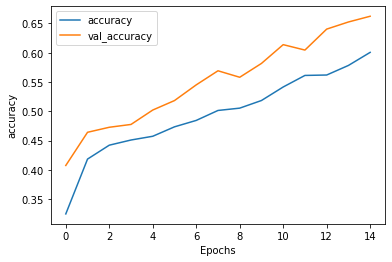

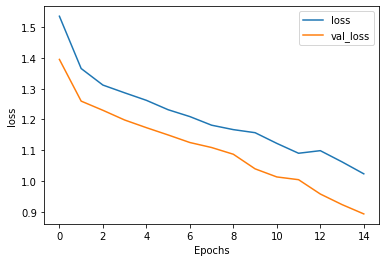

In [43]:
def graph_plots(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    #plt.title('model accuracy')
    plt.legend([string, 'val_'+string])
    plt.show()
    
graph_plots(history, "accuracy")
graph_plots(history, "loss")

Model Evaluation.

In [44]:
loss, accuracy = model.evaluate(xtrain_padding, ytrain_encode, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(xtest_padding, ytest_encode, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.6742
Testing Accuracy:  0.6621


In [45]:
predicted = model.predict(xtest_padding)
predicted
predicted = np.argmax(predicted, axis=1)
predicted = [class_names[pred] for pred in predicted]

In [46]:
import time

message = ['i am happy with your behaviour']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=MAX_LENGTH)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['i am happy with your behaviour']
predicted: joy (0.13 seconds)


In [47]:
import time

message = ['i broke up with my boyfriend']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=MAX_LENGTH)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['i broke up with my boyfriend']
predicted: joy (0.13 seconds)


In [48]:
import time

message = ['delivery was hour late and my pizza was cold!']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=MAX_LENGTH)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['delivery was hour late and my pizza was cold!']
predicted: anger (0.14 seconds)


In [49]:
import time

message = ['i lost the game']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=MAX_LENGTH)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['i lost the game']
predicted: sadness (0.16 seconds)


In [82]:
# creates a HDF5 file 'my_model.h5'
model.save('lstm_glove.h5')